# 보스턴 집값 예측

In [1]:
# 1. drive mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2. csv to df load


filePath = '/content/drive/MyDrive/Colab Notebooks/Data Science/6_scikit-learn/data/Boston_house.csv'

df = pd.read_csv(filePath)

In [4]:
# 3. info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## data info



In [5]:
# 4. describe()

df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [6]:
# 5. head()

df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


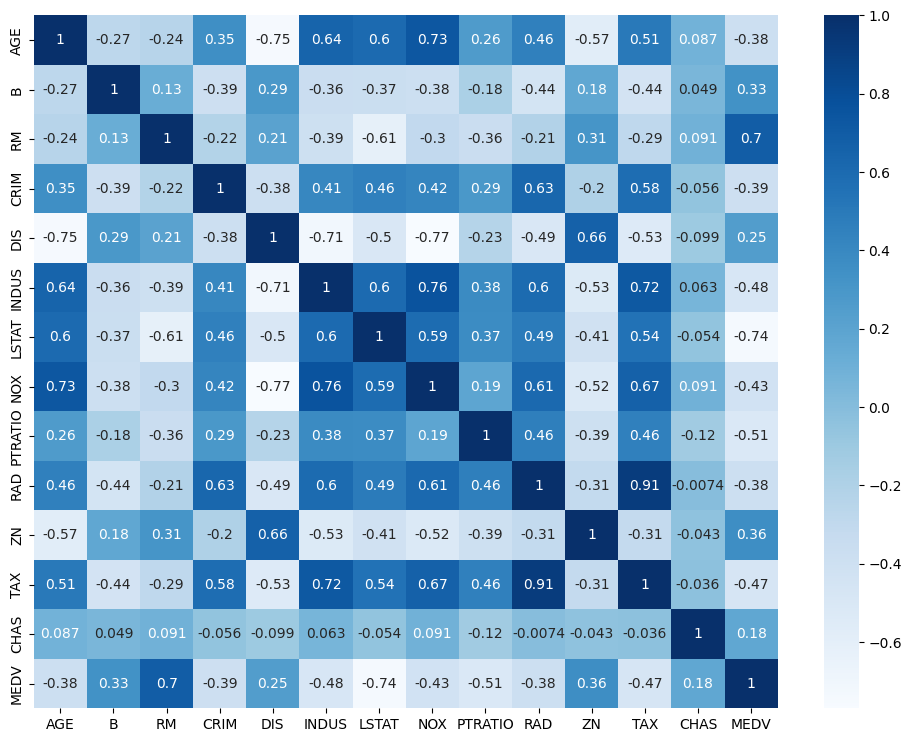

In [39]:
# 상관관계 히트맵

import seaborn as sns
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [7]:
# 시각화 함수

# 이 셀의 코드는 제일 나중에 분석하자.
# 지금은 이게 중요한게 아니다.

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]


def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()


def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()


def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()


# 데이터 분할

In [8]:
# train_test_split : test size ratio를 지정하지 않으면 75:25

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], test_size=0.2, random_state=123)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [10]:
# model1 : Linear Regresstion

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 1. 모델 객체 선언
model = LinearRegression()


# 2. 모델 학습
model.fit(x_train, y_train)


# 3. 모델 추론 (테스트)
y_pred = model.predict(x_test)

In [11]:
y_pred - y_test

,MEDV
410,1.003300
85,1.194474
280,-6.132305
422,-2.473864
199,-4.445125
...,...
229,-0.249167
159,3.310479
196,3.155957
345,-0.975856


In [12]:
model.coef_

array([-9.80167937e-04,  7.22553507e-03,  4.31968412e+00, -9.87931696e-02,
       -1.36597953e+00,  6.69491841e-02, -5.43790245e-01, -1.54697747e+01,
       -9.13487599e-01,  2.84521838e-01,  4.75027102e-02, -1.27533606e-02,
        1.26954150e+00])

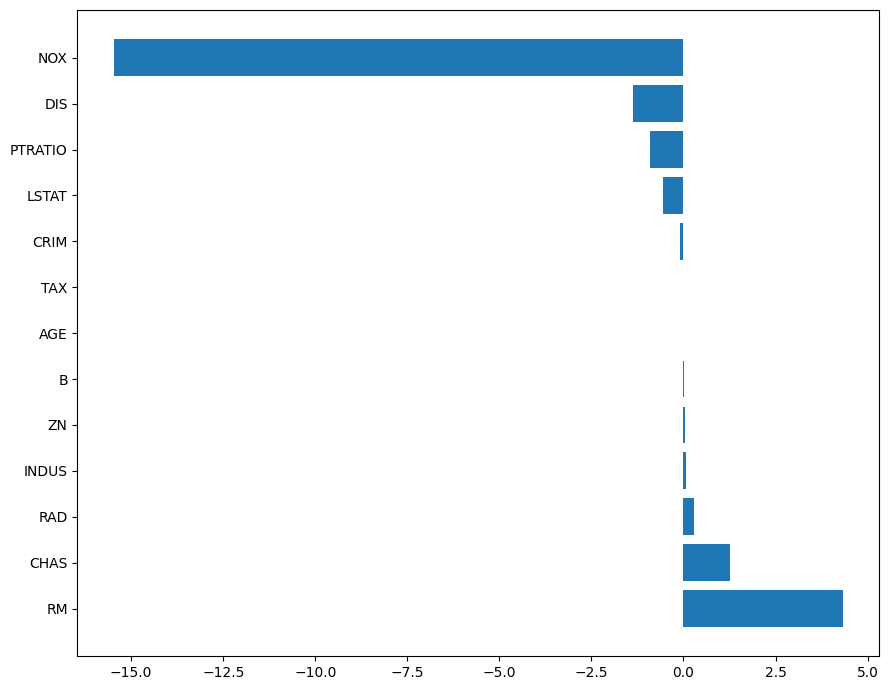

In [13]:
# x 테스트 컬럼명, 모델 평가본으로 plot

plot_coef(x_train.columns, model.coef_)

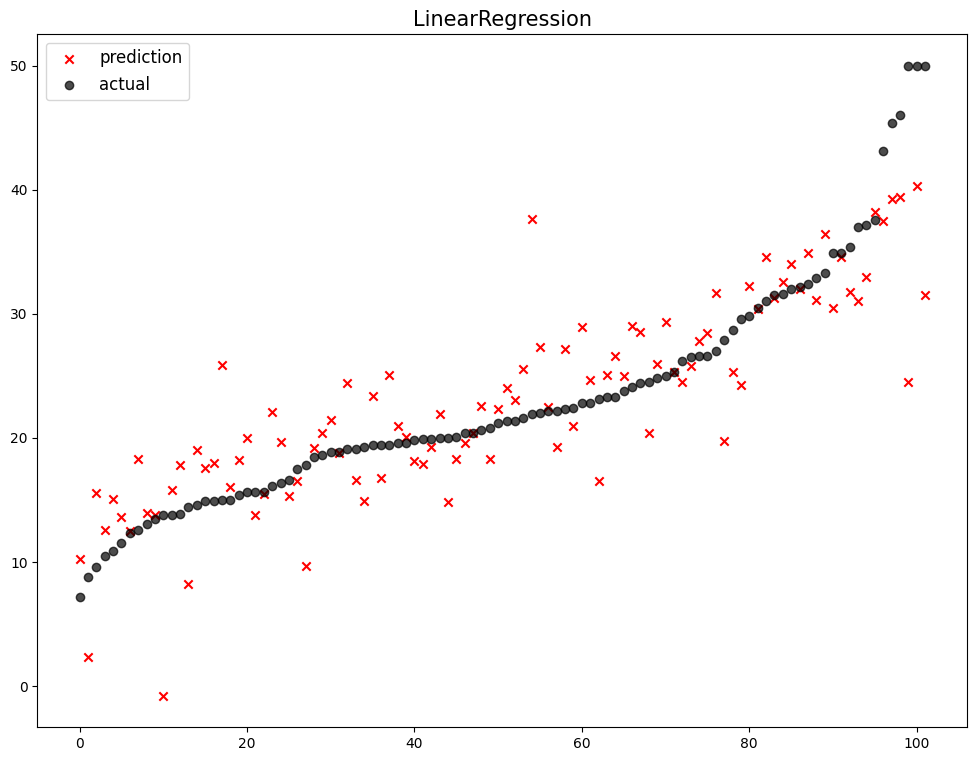

              model        mse
0  LinearRegression  28.192486


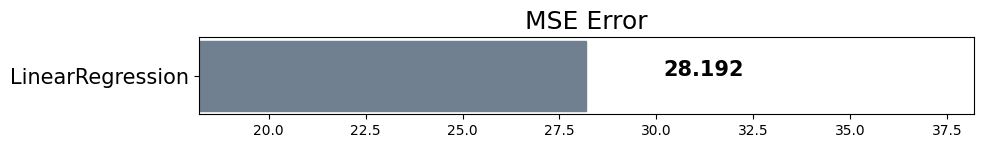

In [14]:
#

mse_eval('LinearRegression', y_pred, y_test)


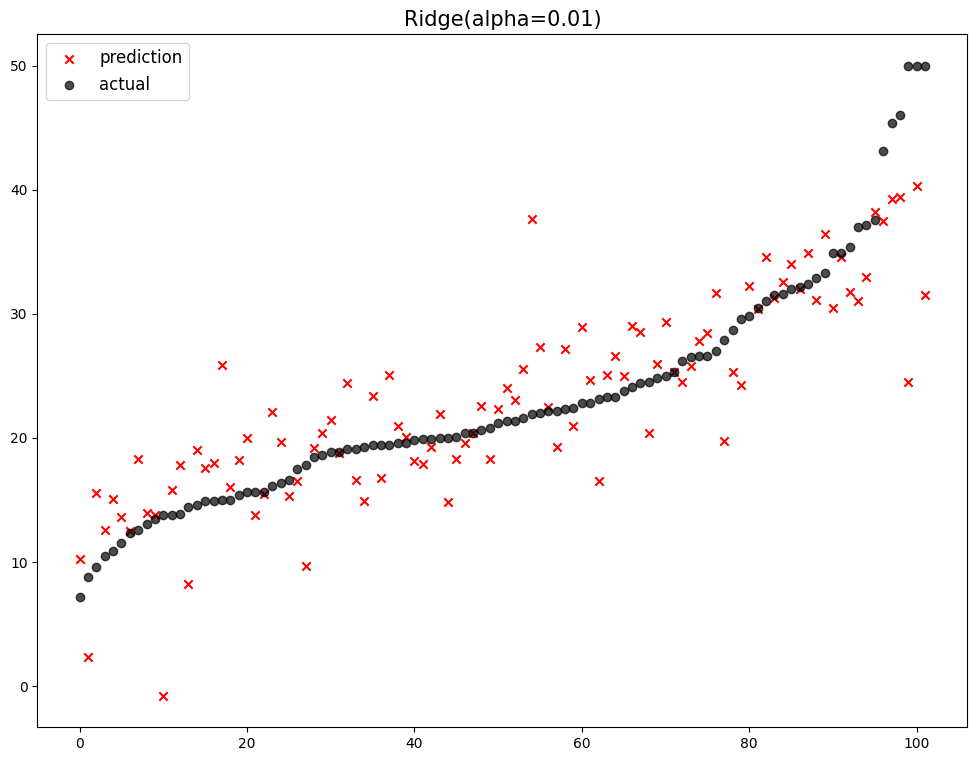

               model        mse
0   LinearRegression  28.192486
1  Ridge(alpha=0.01)  28.192486


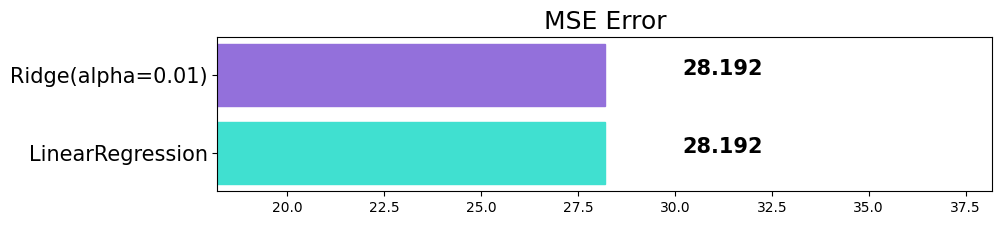

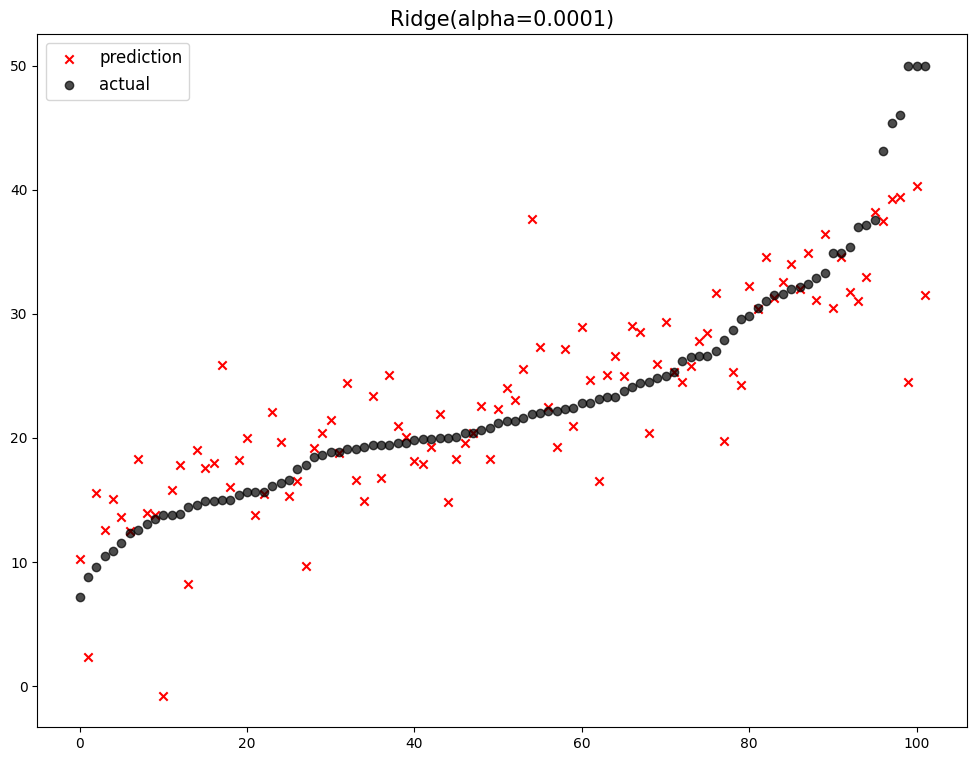

                 model        mse
0     LinearRegression  28.192486
1    Ridge(alpha=0.01)  28.192486
2  Ridge(alpha=0.0001)  28.192486


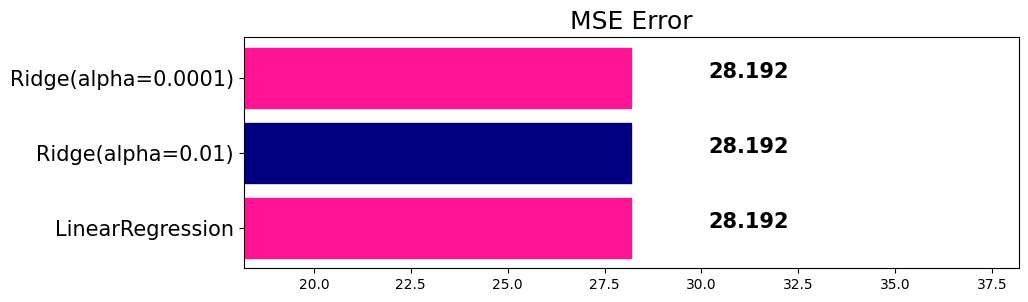

In [15]:
# model2 : ridge

from sklearn.linear_model import Ridge

alphas = [0.01, 0.0001]

for alpha in alphas:
    model = Ridge()
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), y_pred, y_test)

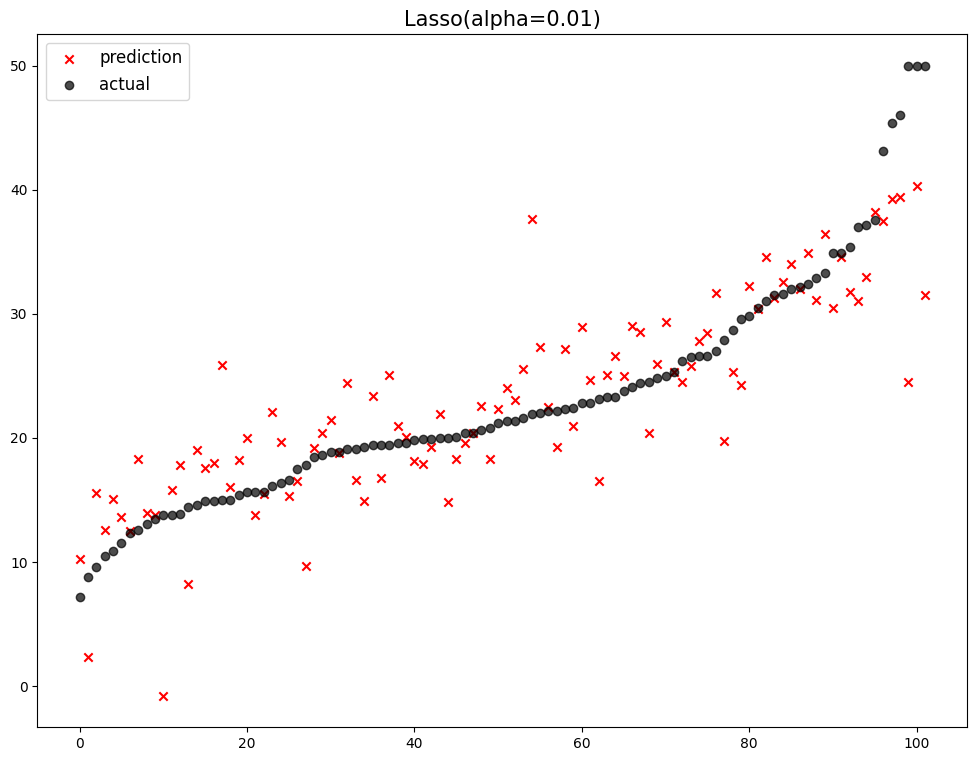

                 model        mse
0     LinearRegression  28.192486
1    Ridge(alpha=0.01)  28.192486
2  Ridge(alpha=0.0001)  28.192486
3    Lasso(alpha=0.01)  28.192486


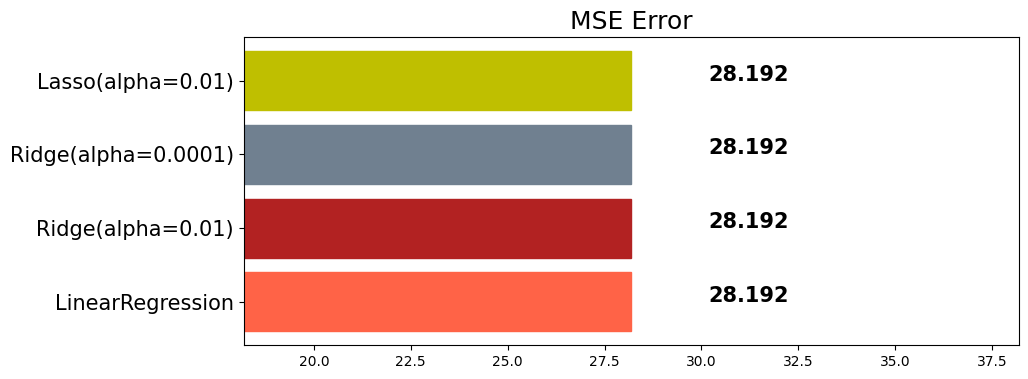

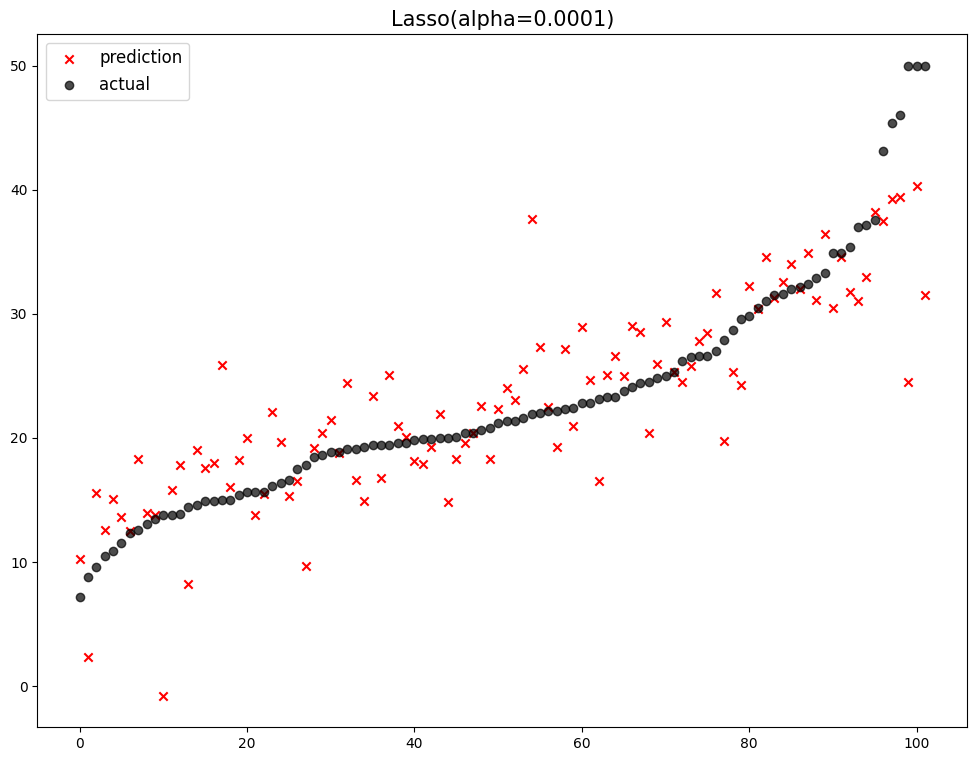

                 model        mse
0     LinearRegression  28.192486
1    Ridge(alpha=0.01)  28.192486
2  Ridge(alpha=0.0001)  28.192486
3    Lasso(alpha=0.01)  28.192486
4  Lasso(alpha=0.0001)  28.192486


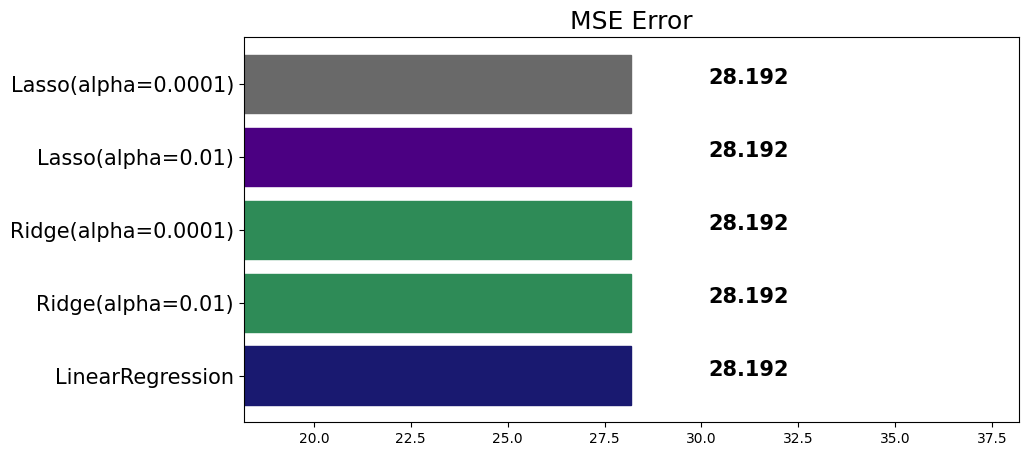

In [16]:
# model3 : lasso

from sklearn.linear_model import Lasso

alphas = [0.01, 0.0001]


for alpha in alphas:
    model = Lasso()
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), y_pred, y_test)

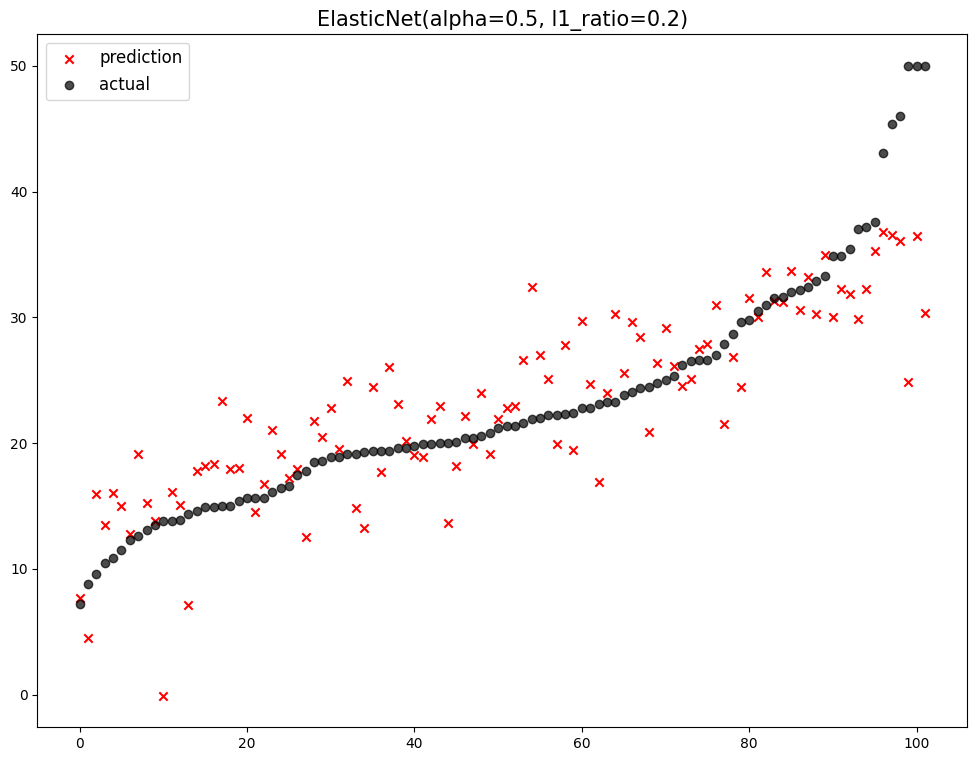

                                 model        mse
0  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
1                     LinearRegression  28.192486
2                    Ridge(alpha=0.01)  28.192486
3                  Ridge(alpha=0.0001)  28.192486
4                    Lasso(alpha=0.01)  28.192486
5                  Lasso(alpha=0.0001)  28.192486


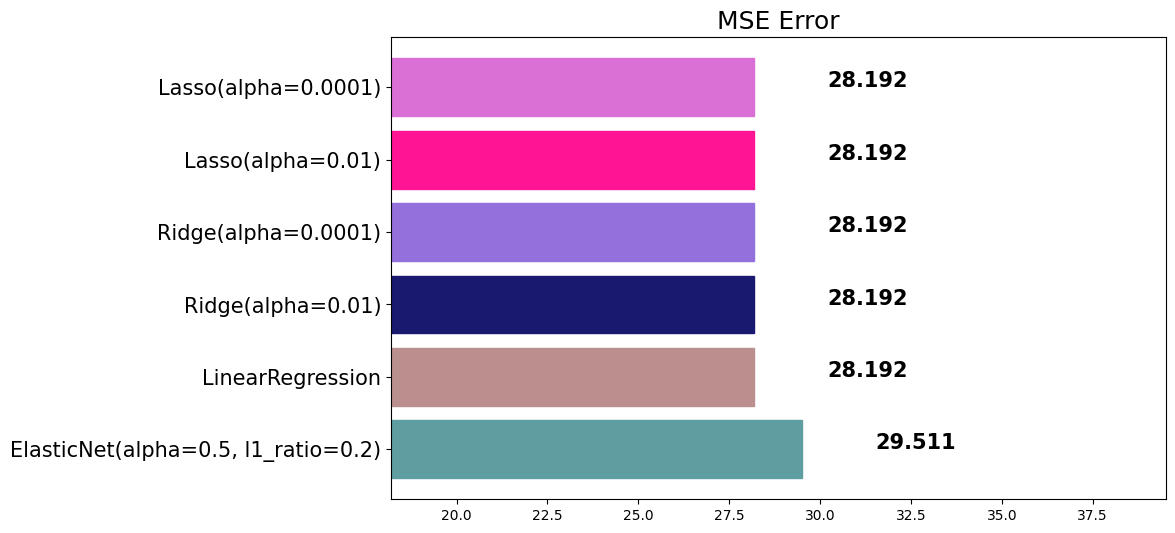

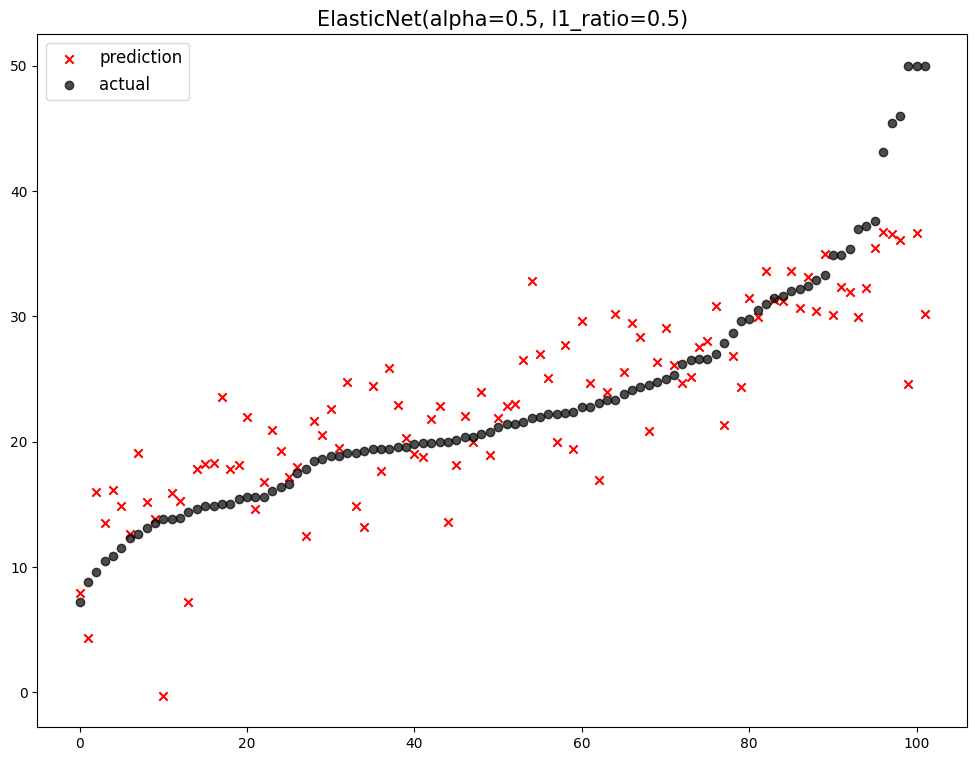

                                 model        mse
0  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
1  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
2                     LinearRegression  28.192486
3                    Ridge(alpha=0.01)  28.192486
4                  Ridge(alpha=0.0001)  28.192486
5                    Lasso(alpha=0.01)  28.192486
6                  Lasso(alpha=0.0001)  28.192486


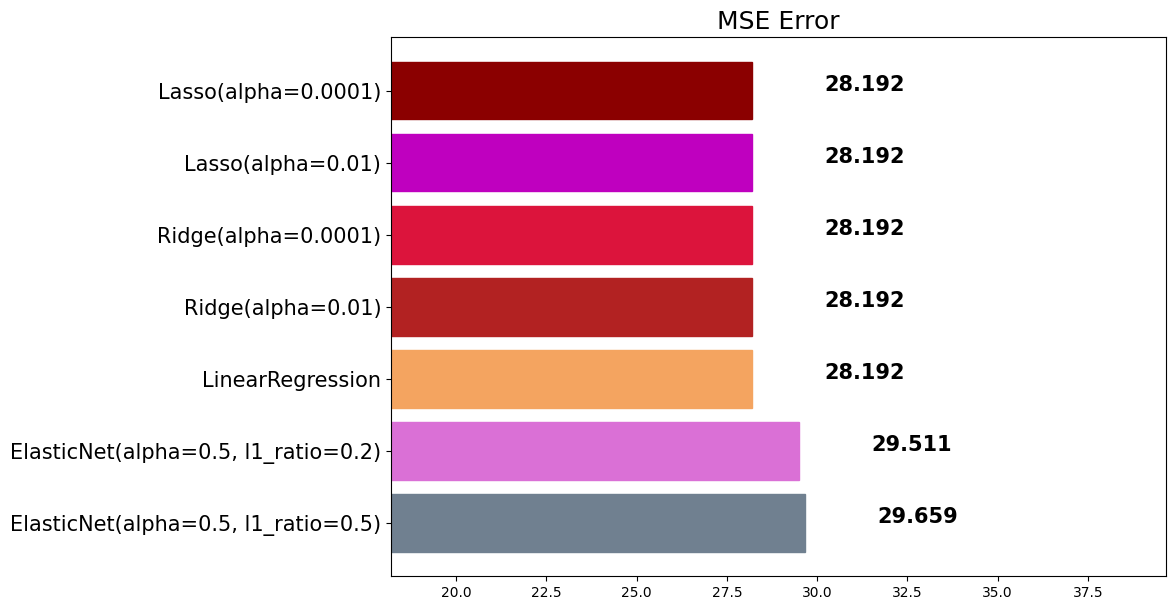

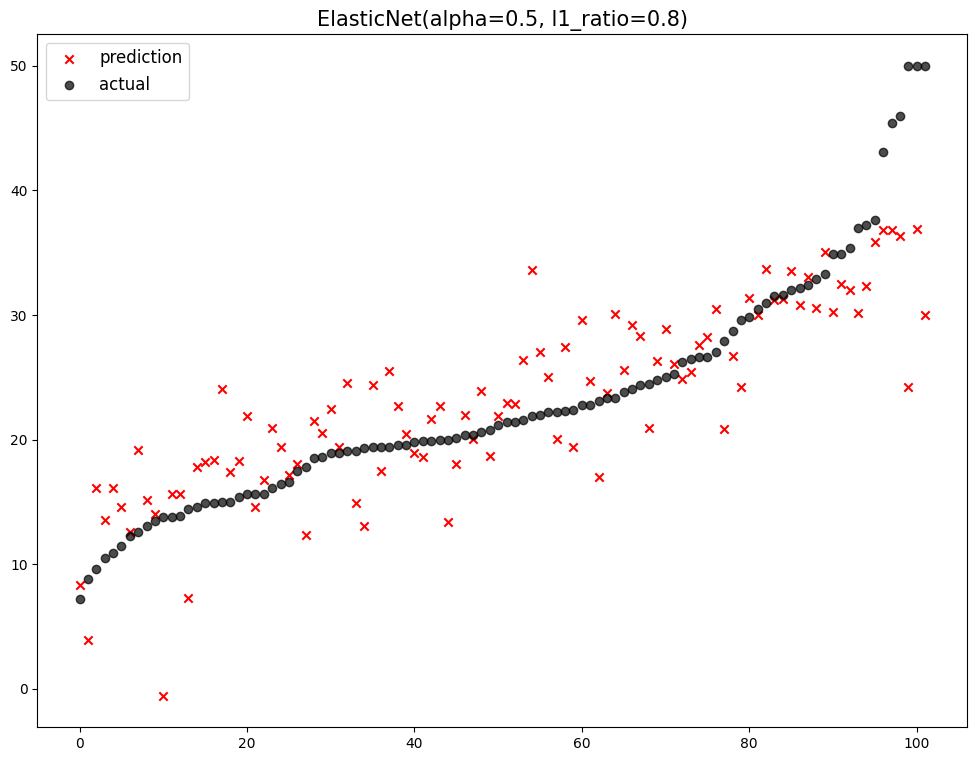

                                 model        mse
0  ElasticNet(alpha=0.5, l1_ratio=0.8)  29.879814
1  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
2  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
3                     LinearRegression  28.192486
4                    Ridge(alpha=0.01)  28.192486
5                  Ridge(alpha=0.0001)  28.192486
6                    Lasso(alpha=0.01)  28.192486
7                  Lasso(alpha=0.0001)  28.192486


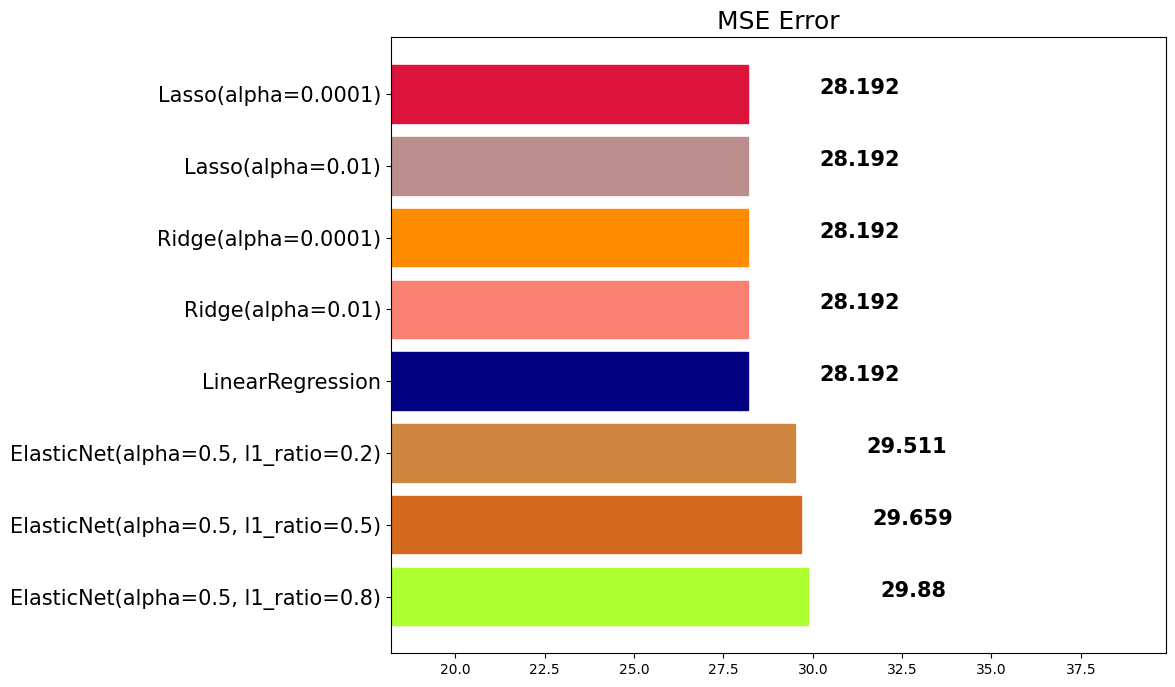

In [35]:
# model 4 : ElasticNet

from sklearn.linear_model import ElasticNet

ratios = [0.2, 0.5, 0.8]
alpha = 0.5

for ratio in ratios:
    model = ElasticNet(alpha=alpha, l1_ratio=ratio)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    name = 'ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio)
    mse_eval(name, y_pred, y_test)

# 스케일링

In [42]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [43]:
# StandardScaler
# 평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러


# 1. StandardScaler 객체 생성
std_scaler = StandardScaler()

# 2. 스케일 적용
std_scaled = std_scaler.fit_transform(x_train)
pd.DataFrame(std_scaled).describe()
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.25,-3.90,-3.86,-0.40,-1.23,-1.55,-1.56,-1.47,-2.73,-0.98,-0.49,-1.32,-0.25
25%,-0.85,0.21,-0.56,-0.40,-0.79,-0.87,-0.79,-0.89,-0.50,-0.64,-0.49,-0.77,-0.25
50%,0.31,0.38,-0.11,-0.38,-0.32,-0.22,-0.19,-0.15,0.27,-0.52,-0.49,-0.47,-0.25
75%,0.90,0.43,0.48,0.01,0.62,1.00,0.60,0.59,0.81,1.68,0.06,1.53,-0.25
max,1.11,0.43,3.47,9.73,3.91,2.38,3.39,2.71,1.65,1.68,3.87,1.80,4.07


In [44]:
# MinMaxScaler
# min값과 max값을 0~1사이로 정규화

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.67,0.90,0.53,0.04,0.24,0.39,0.31,0.35,0.62,0.37,0.11,0.42,0.06
std,0.30,0.23,0.14,0.10,0.20,0.25,0.20,0.24,0.23,0.38,0.23,0.32,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.42,0.95,0.45,0.00,0.08,0.17,0.15,0.14,0.51,0.13,0.00,0.18,0.00
50%,0.76,0.99,0.51,0.00,0.18,0.34,0.28,0.31,0.69,0.17,0.00,0.27,0.00
75%,0.94,1.00,0.59,0.04,0.36,0.65,0.44,0.49,0.81,1.00,0.12,0.91,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [45]:
# RobustScaler : 이상치, 노이즈에 영향을 덜 받는 스케일링 방법
# 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
# outlier 값 처리에 유용



robust_scale = RobustScaler()
robust_scaled = robust_scale.fit_transform(x_train)
round(pd.DataFrame(robust_scaled).describe(), 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.18,-1.73,0.11,0.92,0.23,0.12,0.13,0.10,-0.21,0.23,0.89,0.20,0.06
std,0.57,4.57,0.97,2.44,0.71,0.54,0.72,0.68,0.77,0.43,1.84,0.44,0.23
min,-1.47,-19.52,-3.62,-0.07,-0.64,-0.71,-0.98,-0.89,-2.30,-0.20,0.00,-0.37,0.00
25%,-0.66,-0.79,-0.43,-0.05,-0.33,-0.35,-0.43,-0.50,-0.59,-0.05,0.00,-0.13,0.00
50%,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.34,0.21,0.57,0.95,0.67,0.65,0.57,0.50,0.41,0.95,1.00,0.87,0.00
max,0.46,0.25,3.46,24.65,2.99,1.39,2.56,1.94,1.05,0.95,8.00,0.98,1.00


In [48]:
# pipline adapted
# csv원본 데이터 > 전처리 > 스케일링 > 데이터 분할 > 모델링(훈련용)

# 스탠다드 + 앨라스
# scaler + model > 결과

from sklearn.pipeline import make_pipeline

In [50]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(), ElasticNet(alpha=0.5, l1_ratio=0.2))

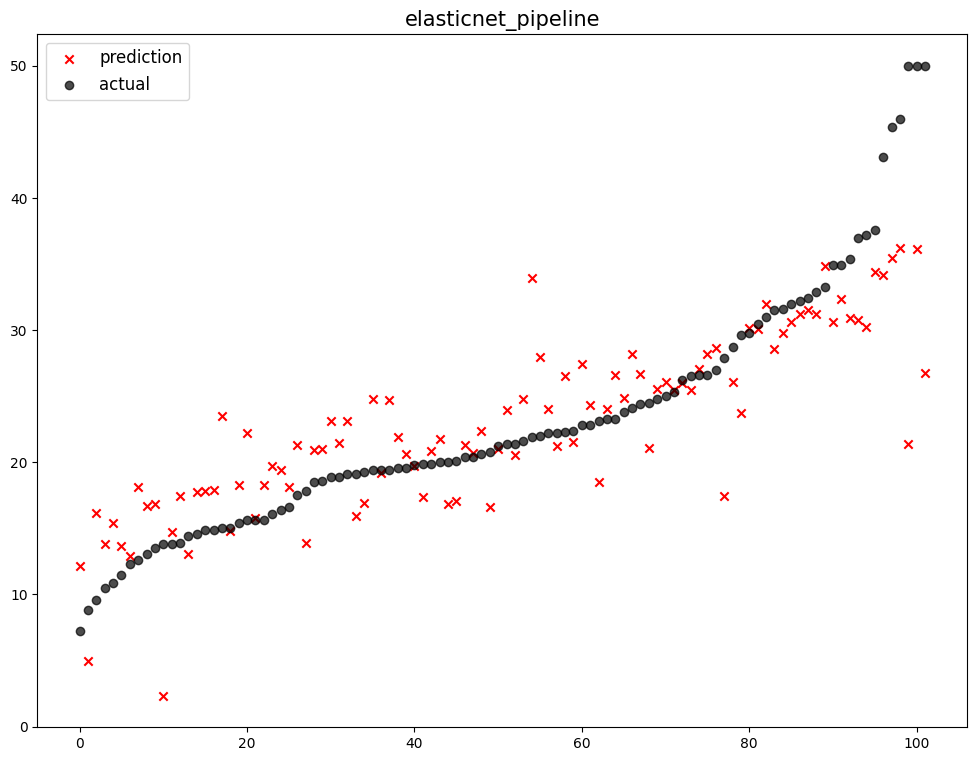

                                 model        mse
0                  elasticnet_pipeline  31.142802
1  ElasticNet(alpha=0.5, l1_ratio=0.8)  29.879814
2  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
3  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
4                     LinearRegression  28.192486
5                    Ridge(alpha=0.01)  28.192486
6                  Ridge(alpha=0.0001)  28.192486
7                    Lasso(alpha=0.01)  28.192486
8                  Lasso(alpha=0.0001)  28.192486


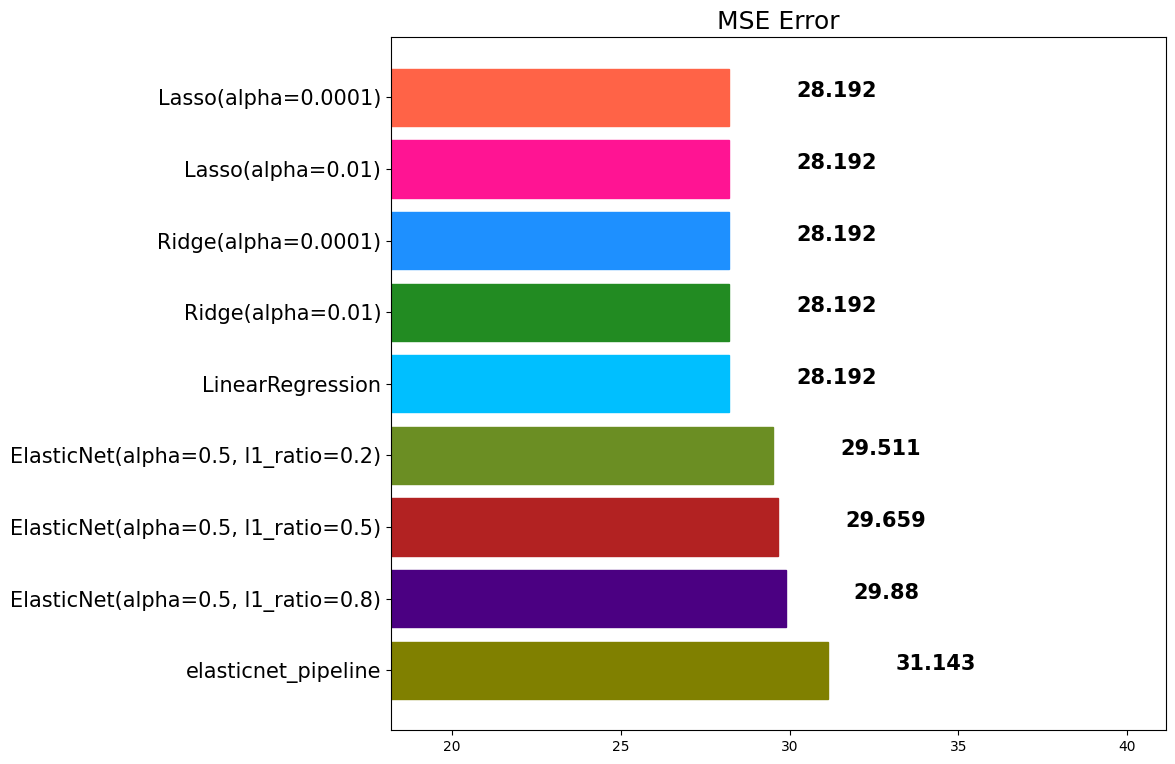

In [51]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('elasticnet_pipeline', elasticnet_pred, y_test)

In [ ]:
## Enemble